## 1. Importando os dados coletados

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/cassiasamp/calculadora-de-imoveis-jun-20/master/coleta_de_dados/dados_mercado_livre.csv')

In [2]:
df.head()

,zona,quartos,area,preco
0,sul,1.0,45.0,950
1,sul,3.0,217.0,7000
2,sul,4.0,320.0,7000
3,sul,5.0,398.0,7000
4,sul,NaN,185.0,7000


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quartos,876.0,2.487443,1.338170,1.0,2.0,2.0,3.0,15.0
area,991.0,194.080727,197.886677,1.0,60.0,120.0,251.5,1643.0
preco,1008.0,7984.386905,54597.675914,400.0,1200.0,2300.0,7000.0,1600000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zona     1008 non-null   object 
 1   quartos  876 non-null    float64
 2   area     991 non-null    float64
 3   preco    1008 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 31.6+ KB


In [5]:
df['preco'] = df['preco'].astype('float')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zona     1008 non-null   object 
 1   quartos  876 non-null    float64
 2   area     991 non-null    float64
 3   preco    1008 non-null   float64
dtypes: float64(3), object(1)
memory usage: 31.6+ KB


## 2. Fazendo a análise exploratória e o preprocessamento dos dados

In [7]:
from sklearn.model_selection import train_test_split

treino, teste = train_test_split(df, stratify=df['zona'],
                                 test_size=0.25, random_state=0)

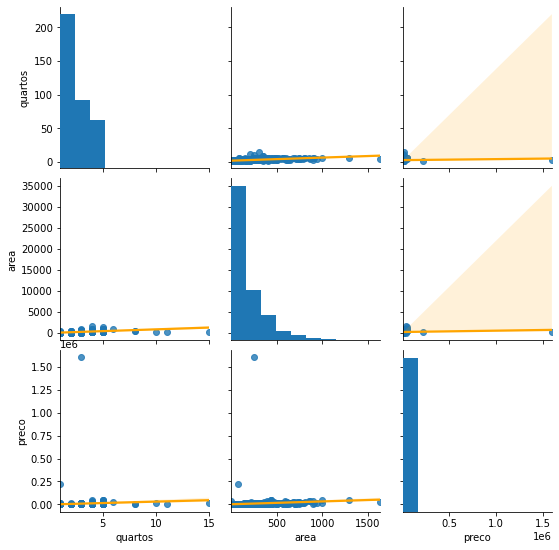

In [8]:
import seaborn as sns

sns.pairplot(treino, kind='reg', plot_kws={'line_kws':{'color':'orange'}});

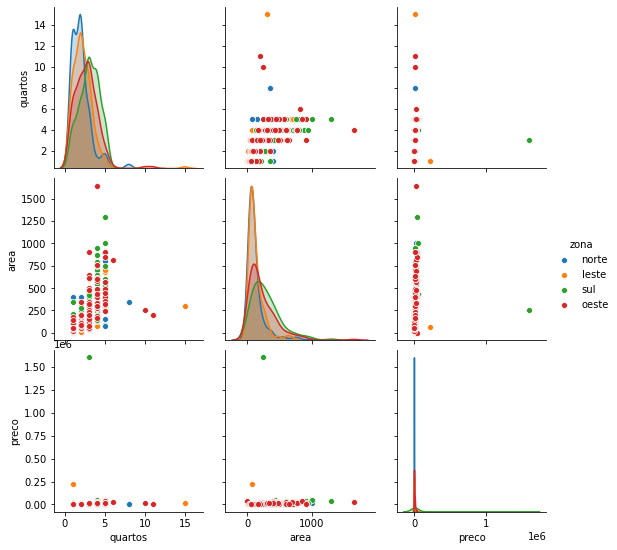

In [9]:
sns.pairplot(treino, hue='zona');

### 2.1 Tratando os dados numéricos




In [10]:
num_cols = ['quartos', 'area', 'preco']
treino_num = treino[num_cols]

In [11]:
treino_num.head()

,quartos,area,preco
426,1.0,40.0,750.0
458,2.0,180.0,2000.0
25,3.0,500.0,6000.0
385,2.0,70.0,1200.0
515,2.0,65.0,1500.0


In [12]:
treino.isnull().sum()

zona        0
quartos    87
area       12
preco       0
dtype: int64

In [13]:
# preenchendo valores faltantes com a mediana

treino_medianas = treino_num.median()

treino_num = treino_num.fillna(treino_medianas)
treino_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 426 to 305
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quartos  756 non-null    float64
 1   area     756 non-null    float64
 2   preco    756 non-null    float64
dtypes: float64(3)
memory usage: 23.6 KB


In [14]:
treino_num.isnull().sum()

quartos    0
area       0
preco      0
dtype: int64

In [15]:
import numpy as np

# aplicando log1p nos dados numéricos
treino_num = treino_num.apply(np.log1p)

In [16]:
treino_num

,quartos,area,preco
426,0.693147,3.713572,6.621406
458,1.098612,5.198497,7.601402
25,1.386294,6.216606,8.699681
385,1.098612,4.262680,7.090910
515,1.098612,4.189655,7.313887
...,...,...,...
828,1.609438,5.111988,8.160804
290,1.098612,5.525453,7.937732
934,1.609438,5.697093,9.648660
975,1.098612,5.805135,9.852247


In [17]:
treino_num.describe().T

,count,mean,std,min,25%,50%,75%,max
quartos,756.0,1.173118,0.337806,0.693147,1.098612,1.098612,1.386294,2.772589
area,756.0,4.839298,0.916260,0.693147,4.110874,4.795791,5.525453,7.404888
preco,756.0,7.949769,1.112353,5.993961,7.090910,7.741099,8.853808,14.285515


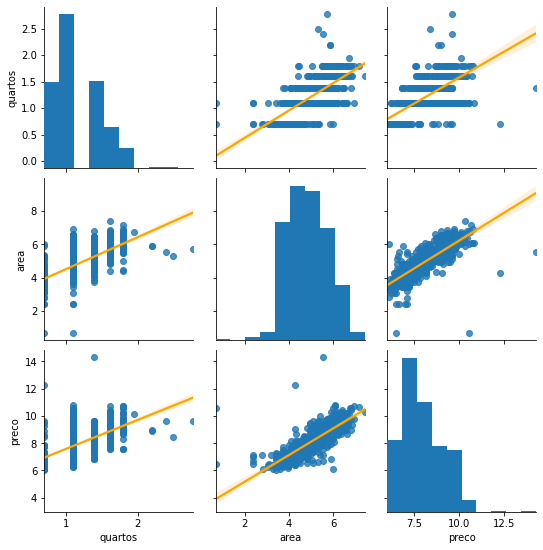

In [18]:
sns.pairplot(treino_num, kind='reg', plot_kws={'line_kws':{'color':'orange'}});

In [19]:
# fazendo ou não a remoção de outliers com IQR

REMOVER_OUTLIERS = False

quartis = treino_num.quantile([0.25, 0.5, 0.75])

Q1 = quartis.loc[0.25]
Q3 = quartis.loc[0.75]
IQR = Q3-Q1

k = 1.5 
limite_inferior = Q1-k*IQR
limite_superior = Q1+k*IQR

treino_num_sem_outlier = treino_num[treino_num>=limite_inferior].dropna()
treino_num_sem_outlier = treino_num_sem_outlier[treino_num_sem_outlier<=limite_superior].dropna()

if REMOVER_OUTLIERS:
    treino = treino.loc[treino_num_sem_outlier.index]

treino_num_sem_outlier

,quartos,area,preco
426,0.693147,3.713572,6.621406
458,1.098612,5.198497,7.601402
25,1.386294,6.216606,8.699681
385,1.098612,4.262680,7.090910
515,1.098612,4.189655,7.313887
...,...,...,...
545,1.098612,4.077537,7.313887
415,1.098612,3.713572,7.313887
589,0.693147,3.931826,7.170888
290,1.098612,5.525453,7.937732


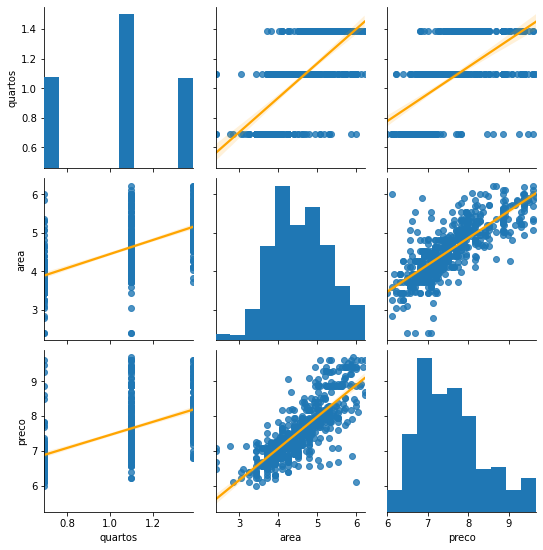

In [20]:
sns.pairplot(treino_num_sem_outlier, kind='reg', plot_kws={'line_kws':{'color':'orange'}});

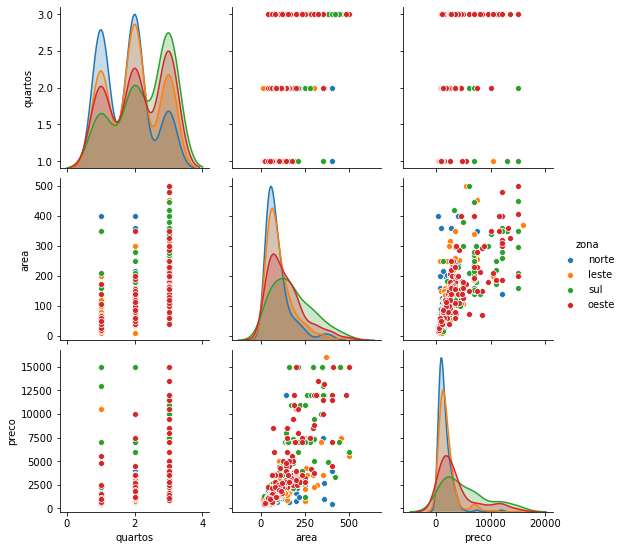

In [21]:
sns.pairplot(treino.loc[treino_num_sem_outlier.index], hue='zona');

### 2.2 Tratando colunas categóricas

In [22]:
cat_cols = ['zona']
treino_cat = treino[cat_cols]

In [23]:
# usando one hot encoding
treino_cat = pd.get_dummies(treino_cat)

In [24]:
treino = pd.concat([treino_cat, treino_num], axis=1)

In [25]:
treino.head()

,zona_leste,zona_norte,zona_oeste,zona_sul,quartos,area,preco
426,0,1,0,0,0.693147,3.713572,6.621406
458,1,0,0,0,1.098612,5.198497,7.601402
25,0,0,0,1,1.386294,6.216606,8.699681
385,0,1,0,0,1.098612,4.262680,7.090910
515,1,0,0,0,1.098612,4.189655,7.313887


### 2.3 Repetindo o preprocessamentos para o conjunto de testes

In [26]:
# Preenchendo valores faltantes com medianas 

# Importante: NUNCA usar informações do conjunto de testes, por isso estamos usando as medianas do conjunto de treino
teste = teste.fillna(treino_medianas)
teste.head()

,zona,quartos,area,preco
350,norte,2.0,450.0,20000.0
433,leste,2.0,250.0,7000.0
951,oeste,4.0,330.0,19000.0
135,sul,3.0,360.0,11500.0
425,norte,3.0,80.0,1100.0


In [27]:
# aplicando log1p nos valores numericos
teste[num_cols] = teste[num_cols].apply(np.log1p)
teste.head()

,zona,quartos,area,preco
350,norte,1.098612,6.111467,9.903538
433,leste,1.098612,5.525453,8.853808
951,oeste,1.609438,5.802118,9.852247
135,sul,1.386294,5.888878,9.350189
425,norte,1.386294,4.394449,7.003974


In [28]:
# fazendo one hot encoding

teste_onehot = pd.get_dummies(teste[cat_cols])
teste=pd.concat([teste_onehot, teste[num_cols]], axis=1)
teste.head()

,zona_leste,zona_norte,zona_oeste,zona_sul,quartos,area,preco
350,0,1,0,0,1.098612,6.111467,9.903538
433,1,0,0,0,1.098612,5.525453,8.853808
951,0,0,1,0,1.609438,5.802118,9.852247
135,0,0,0,1,1.386294,5.888878,9.350189
425,0,1,0,0,1.386294,4.394449,7.003974


### 2.4 Salvando arquivos de treino e teste preprocessados

In [29]:
treino.to_csv('treino_preprocessado.csv', index=False)

In [30]:
teste.to_csv('teste_preprocessado.csv', index=False)